In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Медицинская диагностика

In [4]:
data = np.loadtxt('hos13.dat', skiprows = 1)
print(data.shape)
print(data[:10, :])

(109, 3)
[[  1.1861009  83.14735     0.       ]
 [  1.3237845  67.08343     0.       ]
 [  0.8216278 120.00681     0.       ]
 [  1.1742367  56.82328     1.       ]
 [  1.1961126  84.18729     0.       ]
 [  1.479302   83.16051     0.       ]
 [  1.2122465  94.83045     0.       ]
 [  1.2161919  86.86843     0.       ]
 [  1.1841107  89.14896     0.       ]
 [  1.768121   62.16319     1.       ]]


In [5]:
X = data[:, :2]
y = np.array(data[:, 2], dtype = int)
N, d = X.shape
N, d

(109, 2)

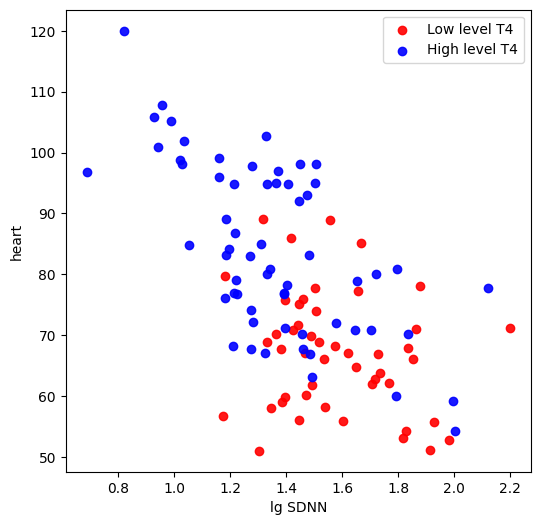

In [59]:
plt.figure(figsize = (6, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y != 1, 0], X[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend()

In [25]:
from sklearn import neighbors

In [61]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
model.fit(X, y)

KNeighborsClassifier()

In [27]:
model.predict([[30, 90]])

array([1])

In [28]:
model.predict_proba([[30, 90]])

array([[0.4, 0.6]])

In [29]:
import mysk

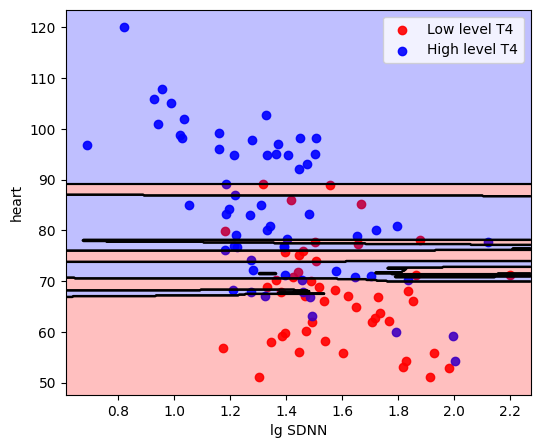

In [62]:
plt.figure(figsize = (6, 5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y != 1, 0], X[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model)
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend()

Наверное, это не совсем то, что мы хотели...

In [33]:
x0_min, x0_max = X[:, 0].min(), X[:, 0].max()
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
d0 = x0_max - x0_min
d1 = x1_max - x1_min

In [74]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', metric_params={"w": [1./d0, 1./d1]})
model.fit(X, y)

KNeighborsClassifier(metric_params={'w': [0.662756316034554,
                                          0.014500663840390612]})

In [76]:
model.predict([[2, 50]])

array([1])

In [77]:
model.predict_proba([[1, 170]])

array([[1., 0.]])

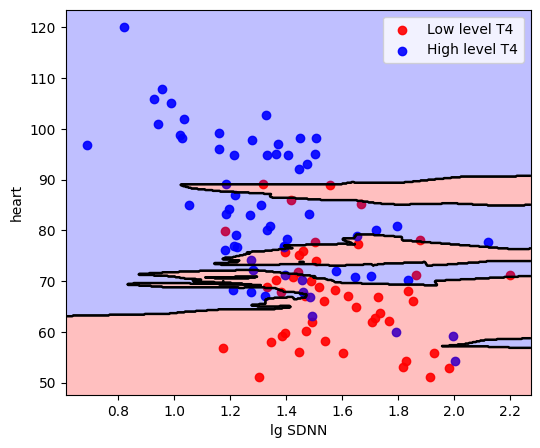

In [75]:
plt.figure(figsize = (6, 5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X[y != 1, 0], X[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model)
plt.xlabel('lg SDNN')
plt.ylabel('heart')
plt.legend()

### Перекрестный контроль

Как проверить качество модели?

Данных слишком мало, чтобы делить их на обучающую и тестовую выборки.

Будем использовать _перекрестный_ (или _скользящий_) _контроль_ (_cross-validation_)

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', metric_params={"w": [1./d0, 1./d1]})
scores = cross_val_score(model, X, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[0.72727273 0.63636364 0.72727273 0.81818182 0.72727273 0.72727273
 0.72727273 0.72727273 0.45454545 0.4       ]
Accuracy: 0.67 (+/- 0.25)
Error:    0.33 (+/- 0.25)


In [96]:
kk = [1, 3, 5, 7] + list(range(10, 44, 2))
err_cv = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    scores = cross_val_score(model, X, y, cv = 5)
    err_cv.append(1 - scores.mean())

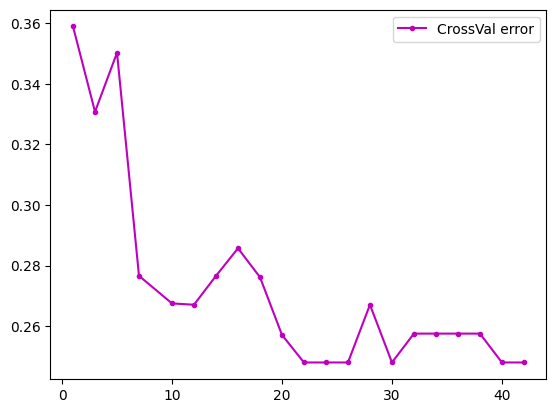

In [99]:
plt.plot(kk, err_cv, '.-m', label = 'CrossVal error')
plt.legend()

In [98]:
print(min(err_cv))
print(kk[err_cv.index(min(err_cv))])

0.24805194805194808
22


(43.0, 0.0)

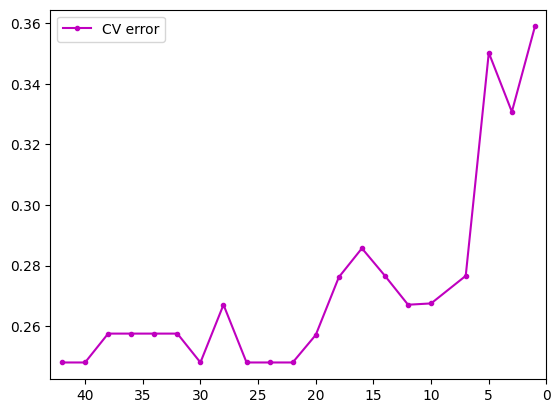

In [101]:
plt.plot(kk, err_cv, '.-m', label = 'CV error')
plt.legend()
plt.xlim([43, 0])

## Стандартизация

In [102]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [103]:
print(X_scaled.mean(axis = 0))
print(X_scaled.std(axis = 0))

[-1.74681880e-16  1.57315547e-15]
[1. 1.]


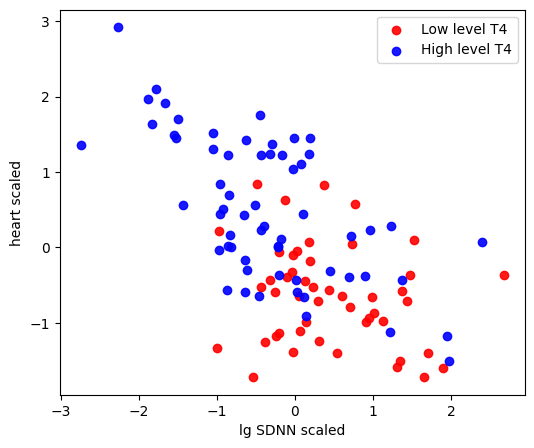

In [105]:
plt.figure(figsize = (6, 5))
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_scaled[y != 1, 0], X_scaled[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend()

In [113]:
model_sc = neighbors.KNeighborsClassifier(n_neighbors = 22)
model_sc.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=22)

In [120]:
scores = cross_val_score(model_sc, X_scaled, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[0.90909091 0.72727273 0.72727273 0.72727273 0.90909091 0.81818182
 0.72727273 0.63636364 0.72727273 0.5       ]
Accuracy: 0.74 (+/- 0.23)
Error:    0.26 (+/- 0.23)


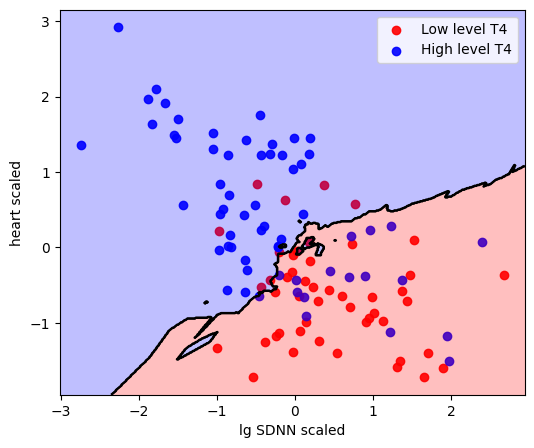

In [115]:
plt.figure(figsize = (6, 5))
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_scaled[y != 1, 0], X_scaled[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model_sc)
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend()

## Приведение к интервалу 0-1

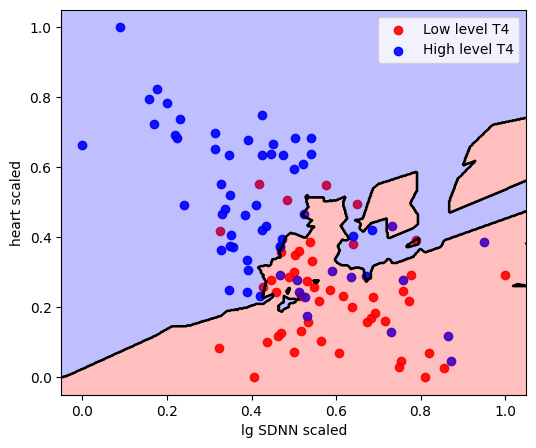

In [123]:
X_minmaxsc = preprocessing.MinMaxScaler().fit_transform(X)
model_minmax = neighbors.KNeighborsClassifier(n_neighbors = 7)
model_minmax.fit(X_minmaxsc, y)

plt.figure(figsize = (6, 5))
plt.scatter(X_minmaxsc[y == 1, 0], X_minmaxsc[y == 1, 1], color = 'r', alpha = 0.9, label = 'Low level T4')
plt.scatter(X_minmaxsc[y != 1, 0], X_minmaxsc[y != 1, 1], color = 'b', alpha = 0.9, label = 'High level T4')
mysk.draw_sep_curve(model_minmax)
plt.xlabel('lg SDNN scaled')
plt.ylabel('heart scaled')
plt.legend()

In [131]:
scores = cross_val_score(model_minmax, X_minmaxsc, y, cv = 10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))

[0.90909091 0.72727273 0.72727273 0.72727273 0.90909091 0.81818182
 0.72727273 0.72727273 0.72727273 0.5       ]
Accuracy: 0.75 (+/- 0.22)
Error:    0.25 (+/- 0.22)


(43.0, 0.0)

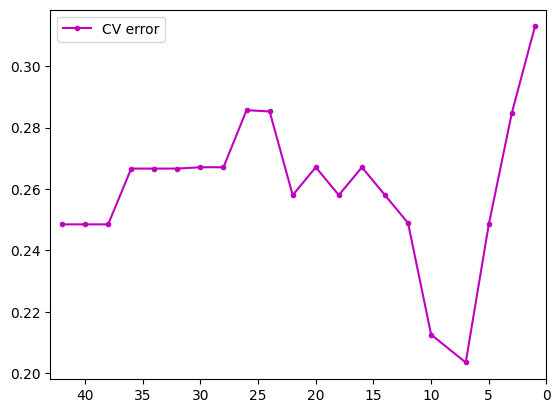

In [132]:
kk = [1, 3, 5, 7] + list(range(10, 44, 2))
err_cv = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_minmaxsc, y)
    scores = cross_val_score(model, X_minmaxsc, y, cv = 5)
    err_cv.append(1 - scores.mean())
    
plt.plot(kk, err_cv, '.-m', label = 'CV error')
plt.legend()
plt.xlim([43, 0])

In [126]:
print(min(err_cv))
print(kk[err_cv.index(min(err_cv))])

0.20346320346320346
7
